<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/East_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Second Model for East of Washington

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_wa.xlsx")

fd

,EastofWA,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,2.41,11.0,67703,534,516,2326,2,11,0,...,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,0.00,18.2,62500,435,305,1524,24,12,2,...,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,0.42,29.0,42900,2656,477,3747,48,15,2,...,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,2.59,27.0,55521,1018,330,1764,13,29,0,...,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0.00,28.0,57831,1869,287,2342,22,58,0,...,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1,1.44,29.4,52059,1441,473,1459,17,42,7,...,2.675778,3.134814,1.255273,1.633468,0.903090,3.177248,3.146748,3.281488,1.806180,2.526339
1435,1,0.08,23.4,51875,1171,431,1164,12,13,3,...,2.635484,3.028978,1.113943,1.146128,0.602060,3.285557,2.748963,2.833784,1.799341,2.340444
1436,1,2.76,31.2,36659,2520,440,1106,31,130,7,...,2.644439,3.004751,1.505150,2.117271,0.903090,3.007748,3.651859,3.707655,2.012837,2.794488
1437,1,1.73,21.2,44451,1711,364,1750,30,23,0,...,2.562293,3.218798,1.491362,1.380211,0.000000,2.690196,3.380754,3.555820,1.924279,2.652246


In [ ]:
# drop the irrelevant inputs
wa = fd.drop(fd.columns[1:15], axis=1)


wa.head()

,EastofWA,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,1,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,0,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


### Subsets for WA

In [ ]:
# Two Subsets
east = wa[wa['EastofWA'] == 1] # Subset where EastofWA equals 1
west = wa[wa['EastofWA'] == 0] # Subset where EastofWA equals 0

# Drop the dimension
east = east.drop(['EastofWA'], axis=1)
west = west.drop(['EastofWA'], axis=1)

print(west.head())

    FoodDesert  log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
61           1        1.709694           1.056905                  4.697308   
62           1        0.471292           1.494155                  4.401900   
63           1        0.394452           1.294466                  4.656367   
64           1        0.113943           1.190332                  4.706650   
65           1        0.737987           1.468347                  4.641375   

    log10_TractKids  log10_TractSeniors  log10_TractWhite  log10_TractBlack  \
61         2.187521            2.227887          3.075912          2.390935   
62         3.128076            2.701568          3.517855          1.462398   
63         2.530200            2.445604          3.061075          0.845098   
64         2.793092            2.778874          3.456518          0.845098   
65         2.925312            2.725912          3.474944          1.633468   

    log10_TractAsian  log10_TractNHOPI  log10_Trac

## East of Washington

### Method selection

In [ ]:
# divided wa data into the independent and dependent variables
X = east.drop(['FoodDesert'], axis = 1) # all independent
y = east['FoodDesert']  # target

X.head()

,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


In [ ]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1434    0
1435    1
1436    0
1437    0
1438    0
Name: FoodDesert, Length: 326, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.591
Precision: 0.647
Recall: 0.344
F1 Score: 0.449

Decision Tree Results:
Accuracy: 0.485
Precision: 0.450
Recall: 0.281
F1 Score: 0.346

Random Forest Results:
Accuracy: 0.636
Precision: 0.722
Recall: 0.406
F1 Score: 0.520

XGBoost Results:
Accuracy: 0.606
Precision: 0.688
Recall: 0.344
F1 Score: 0.458

LightGBM Results:
Accuracy: 0.591
Precision: 0.647
Recall: 0.344
F1 Score: 0.449

SVM Results:
Accuracy: 0.515
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

KNN Results:
Accuracy: 0.561
Precision: 0.556
Recall: 0.469
F1 Score: 0.508



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistics Regression classification baseline model


In [ ]:
# Print the model's performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define logistic regression model with default hyperparameters
lr_base = LogisticRegression(max_iter=1000)

# Train the model
lr_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_base.predict(X_test)

# Print the model's performance metrics
print("The baseline model Results:")
print_performance_metrics(y_test, y_pred)

The baseline model Results:
Accuracy: 0.591
Precision: 0.647
Recall: 0.344
F1 Score: 0.449


Accuracy: the baseline model has an accuracy of 0.591, which means that it correctly classified 59.1% of the test set samples.

Precision:the baseline model has a precision of 0.647, which means that when it predicted a positive label, it was correct 64.7% of the time.

Recall: the baseline model has a recall of 0.344, which means that it correctly identified only 34.4% of the actual positive samples.

F1 Score: the baseline model has an F1 score of 0.449.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Outlier checking

In [ ]:
# create logistic regression classifier
lr_clf = LogisticRegression(max_iter=1000)

# remove outliers using the IQR method
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1
threshold = 1.5 * IQR
lower, upper = Q1 - threshold, Q3 + threshold
mask = np.logical_or(X_train < lower, X_train > upper)
X_train_no_outliers = X_train[~mask.any(axis=1)]
y_train_no_outliers = y_train[~mask.any(axis=1)]

# fit logistic regression classifier on the new dataset without outliers
lr_clf.fit(X_train_no_outliers, y_train_no_outliers)

# evaluate logistic regression classifier on test set
accuracy = lr_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.576


> Removing outliers doesn't improve the model.

In [ ]:
# print outliers
outliers = X_train[mask.any(axis=1)]
print(outliers)

      log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
53          0.130334           0.633468                  4.911940   
1234        0.878522           1.514548                  4.306017   
1218        0.045323           1.120574                  4.882006   
1380        0.064458           1.204120                  4.704116   
242         1.009451           1.550228                  3.756180   
1434        0.387390           1.481443                  4.471277   
36          0.332438           1.618048                  4.074963   
250         0.225309           1.320146                  4.467416   
21          0.000000           0.869232                  4.928345   
1394        1.494711           1.627366                  3.861056   
1364        1.711807           1.713491                  4.597947   
23          0.000000           0.397940                  4.985229   
28          0.000000           0.785330                  5.099556   
1268        0.851870           1.0

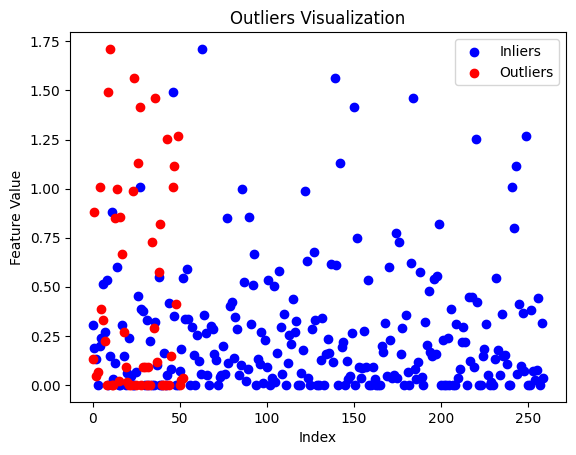

In [ ]:
import matplotlib.pyplot as plt

# Plotting a specific feature against the index of the data points
feature_index = 0  # Adjust this value to the desired feature index

plt.scatter(range(len(X_train)), X_train.iloc[:, feature_index], c='blue', label='Inliers')
plt.scatter(range(len(outliers)), outliers.iloc[:, feature_index], c='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Outliers Visualization')
plt.legend()
plt.show()



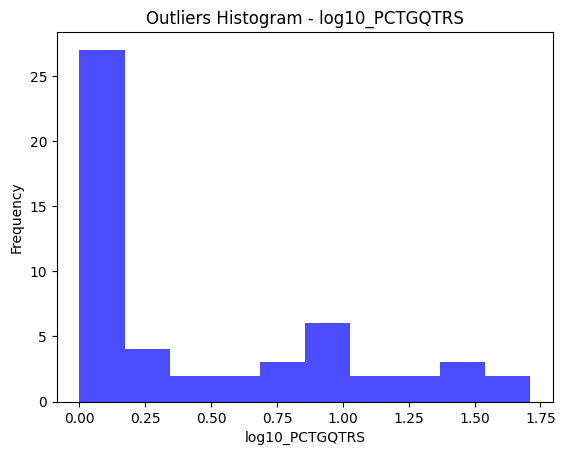

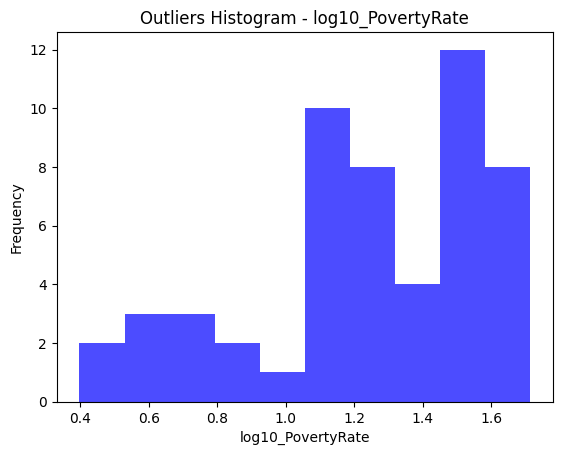

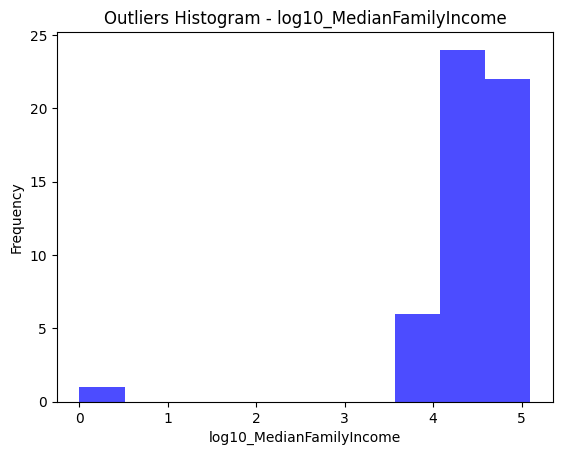

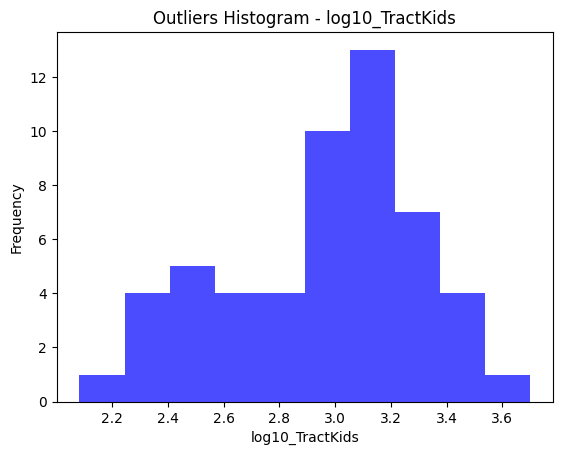

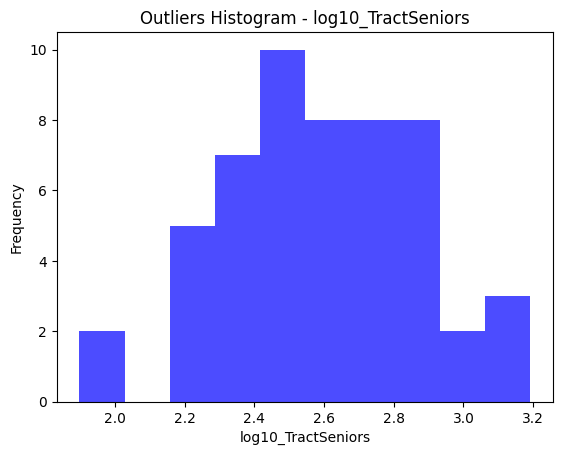

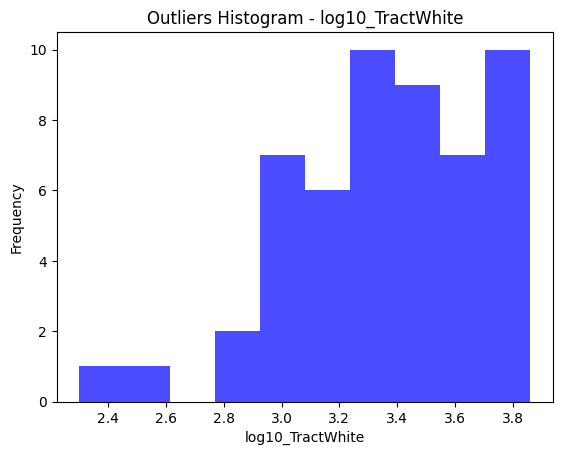

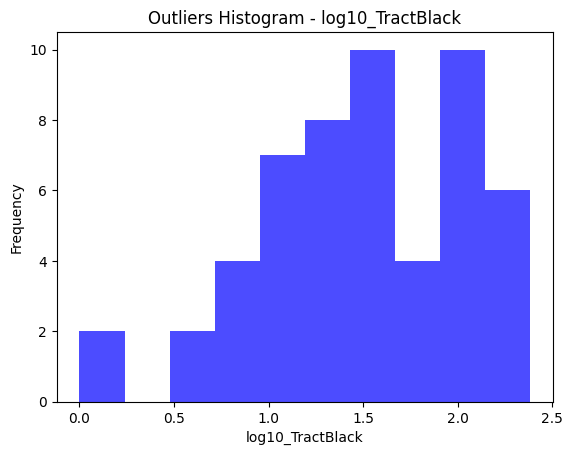

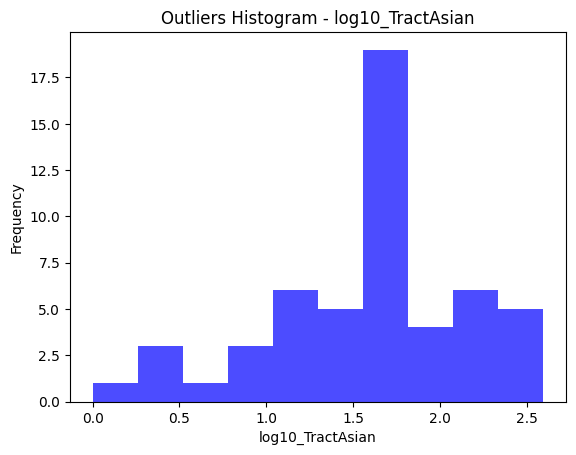

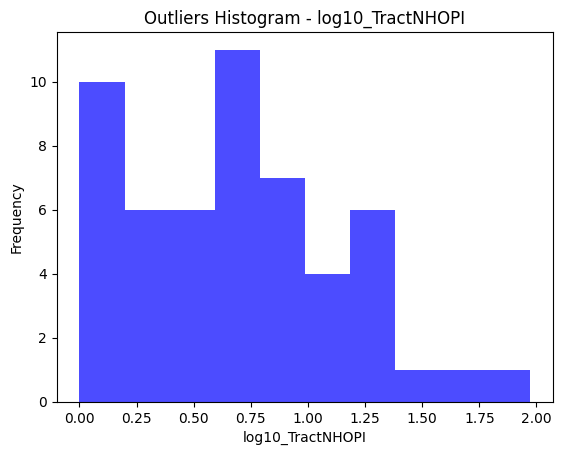

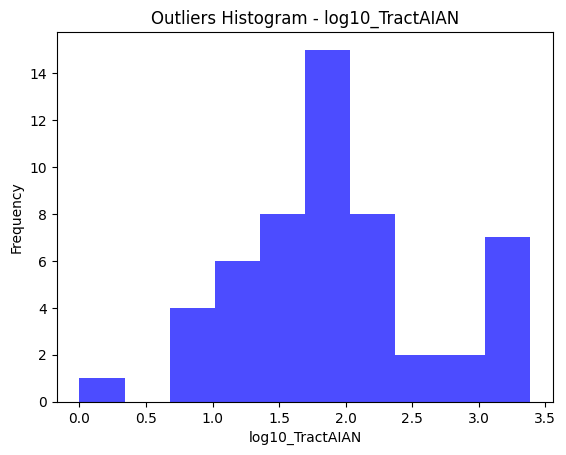

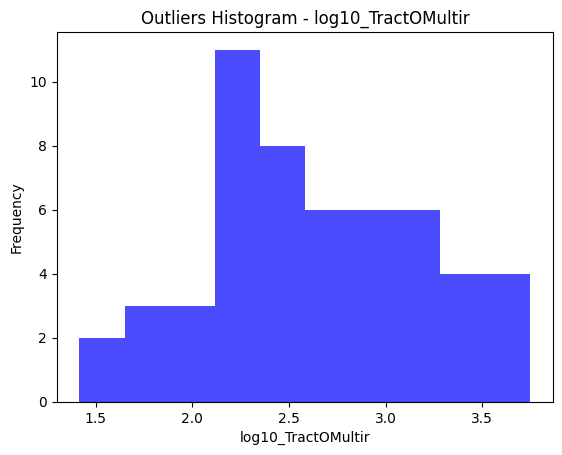

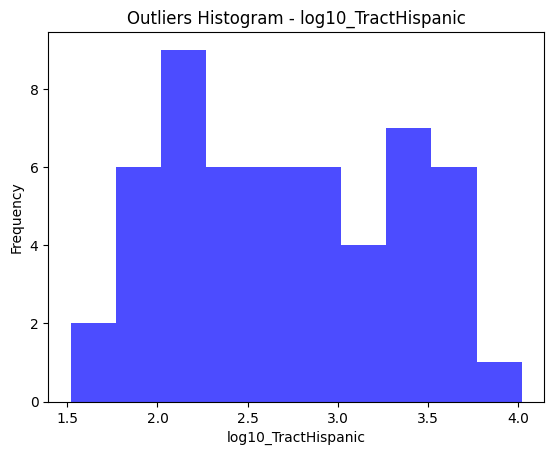

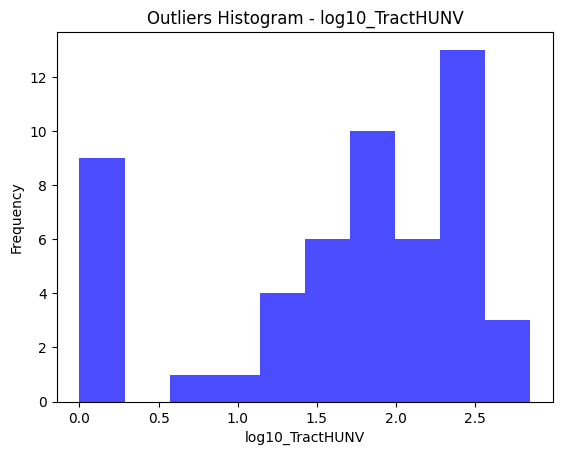

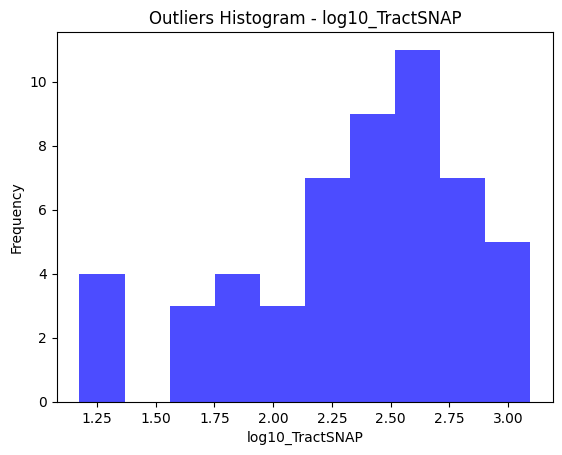

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with outliers
outliers_df = pd.DataFrame(outliers, columns=X_train.columns)

# Plotting histograms for outliers in each variable
for column in outliers_df.columns:
    plt.figure()
    plt.hist(outliers_df[column], bins=10, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Outliers Histogram - {column}')
    plt.show()


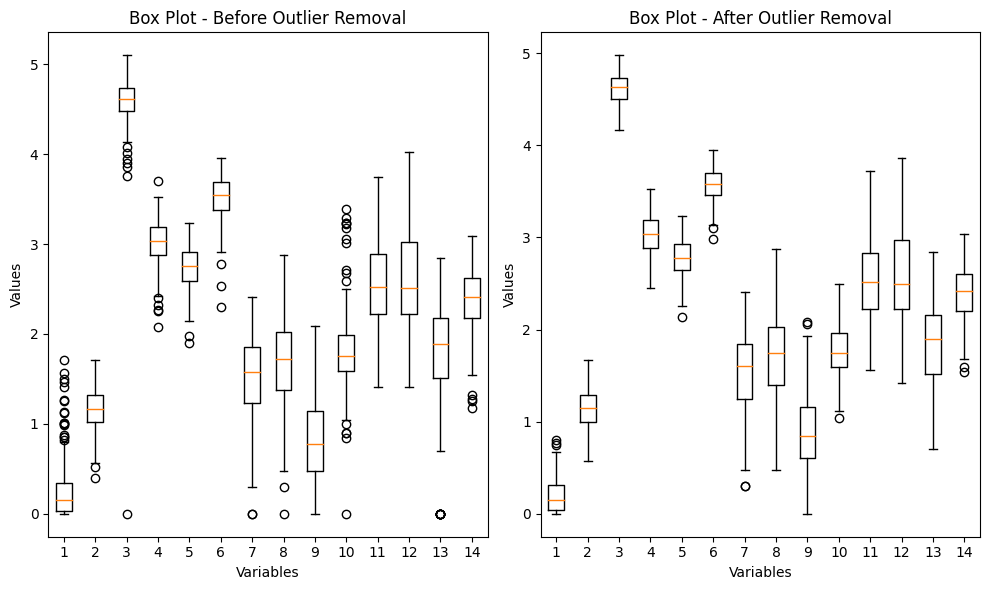

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots of the variable before and after outlier removal
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot - Before Outlier Removal')

plt.subplot(1, 2, 2)
plt.boxplot(X_train_no_outliers)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot - After Outlier Removal')

plt.tight_layout()
plt.show()


### Feature selection

#### L1 regularization

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 regularization (Lasso)
lr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=123, max_iter=100)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict target values on the test set
y_pred1 = lr_model.predict(X_test)

# print the metrics
print_performance_metrics(y_test, y_pred1)


Accuracy: 0.500
Precision: 0.467
Recall: 0.219
F1 Score: 0.298


#### Recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

# create a logistic regression object
lr2 = LogisticRegression(random_state=123, max_iter=1000)

# create a recursive feature eliminator object
rfe = RFE(lr2, n_features_to_select=5)

# fit the recursive feature eliminator to the training data
rfe.fit(X_train, y_train)

# transform the training and testing data to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# fit a logistic regression model using the selected features
lr_rfe = LogisticRegression(random_state=123)
lr_rfe.fit(X_train_rfe, y_train)

# make predictions on the testing data
y_pred2 = lr_rfe.predict(X_test_rfe)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred2)

Accuracy: 0.576
Precision: 0.625
Recall: 0.312
F1 Score: 0.417


### Class imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
lr_bal = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=123)

# Fit the model on the training data
lr_bal.fit(X_train, y_train)

# Make predictions on the testing data
y_pred3 = lr_bal.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred3)

Accuracy: 0.667
Precision: 0.632
Recall: 0.750
F1 Score: 0.686


> Class imbalance improves the model. 0.591 -> 0.667

### Hyperparameter tuning

In [ ]:
# evaluating the performance of a classification model on both training and testing datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("__________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2'],
              'solver': ['lbfgs', 'liblinear']}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr_bal, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Make predictions on the testing data using the best model
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)



# Evaluate the performance of the ensemble
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print_score(best_lr, X_train, y_train, X_test, y_test, train=True)
print_score(best_lr, X_train, y_train, X_test, y_test, train=False)


Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score:  0.573076923076923
Accuracy: 0.667
Precision: 0.632
Recall: 0.750
F1 Score: 0.686
Train Result:
Accuracy Score: 0.638
__________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.763780   0.518797  0.638462    0.641288      0.670498
recall       0.602484   0.696970  0.638462    0.649727      0.638462
f1-score     0.673611   0.594828  0.638462    0.634219      0.643613
support    161.000000  99.000000  0.638462  260.000000    260.000000
__________________________________________________________
Confusion Matrix: 
 [[97 64]
 [30 69]]

Test Result:
Accuracy Score: 0.667
_________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.714286   0.631579  0.666667   0.672932      0.674185
recall   

### Ensembling

#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Set up the bagging classifier
bagging = BaggingClassifier(base_estimator=best_lr, n_estimators=10, random_state=123)

# Fit the bagging classifier to the training data
bagging.fit(X_train, y_train)

# Make predictions on the testing data
y_pred1 = bagging.predict(X_test)

# Evaluate the performance of the ensemble
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.652
Precision: 0.610
Recall: 0.781
F1 Score: 0.685


#### Boosting

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Define the AdaBoost classifier
ada = AdaBoostClassifier(base_estimator=best_lr, n_estimators=50, learning_rate=0.1)

# Train and evaluate the model using cross-validation
scores = cross_val_score(ada, X, y, cv=5)
accuracy = scores.mean()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")



Accuracy: 0.521
Precision: 0.632
Recall: 0.750
F1 Score: 0.686


#### Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Create the individual models

nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=123)

# Create the voting ensemble
ensemble = VotingClassifier(estimators=[('lr', best_lr), ('nb', nb), ('dt', dt)], voting='hard')

# Train the ensemble on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ensemble.predict(X_test)

# Evaluate the performance of the ensemble
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.636
Precision: 0.611
Recall: 0.688
F1 Score: 0.647


> The final is best_lr. 0.667

In [ ]:
# Save the final model to a file
from joblib import dump

dump(best_lr, 'east_lr.pkl')


['east_lr.pkl']

### Validation

In [ ]:
# Load the saved model from a file
from joblib import load
elr= load('east_lr.pkl')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the coefficient matrix from the model
coef_matrix = elr.coef_

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the results
print(vif)



                    Variable          VIF
0             log10_PCTGQTRS     2.615662
1          log10_PovertyRate    58.275507
2   log10_MedianFamilyIncome   181.425191
3            log10_TractKids   935.789210
4         log10_TractSeniors   470.897379
5           log10_TractWhite  1144.864360
6           log10_TractBlack    39.811969
7           log10_TractAsian    38.301256
8           log10_TractNHOPI     7.339103
9            log10_TractAIAN    45.739685
10        log10_TractOMultir  1274.485122
11       log10_TractHispanic   814.977532
12           log10_TractHUNV    25.627524
13           log10_TractSNAP   175.594219


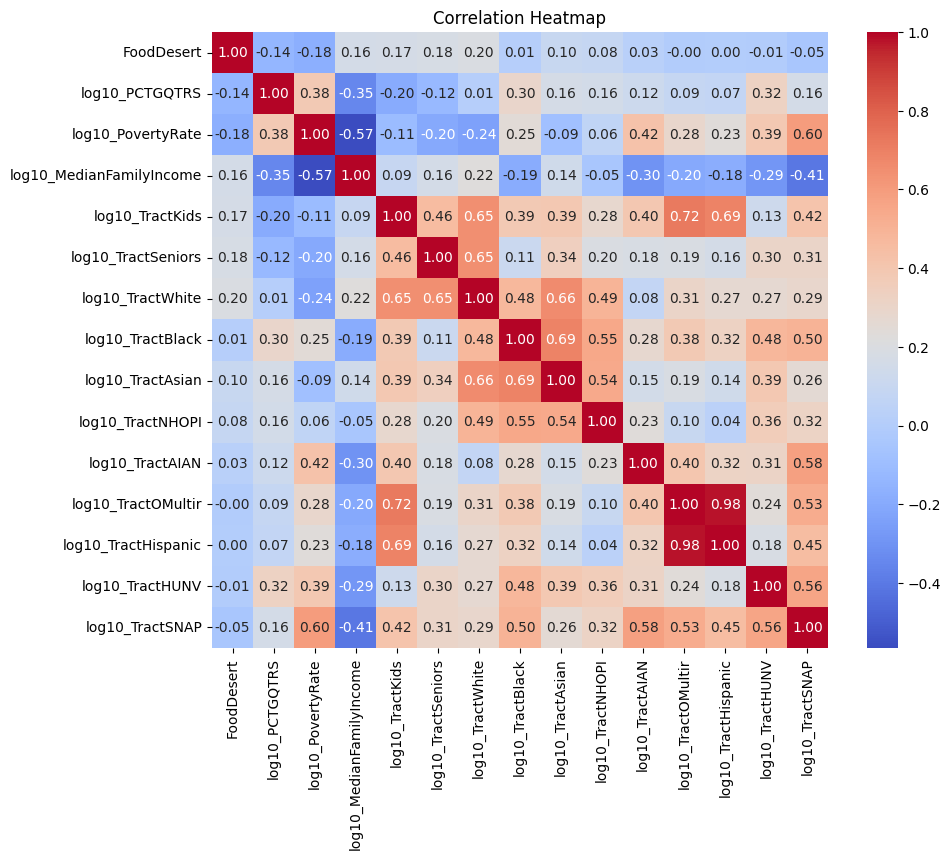

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = east.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Drop the variable with high VIF
updated_X = X.drop(['log10_TractAsian','log10_TractWhite','log10_PovertyRate','log10_TractBlack','log10_TractAIAN','log10_TractHUNV','log10_TractNHOPI'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(updated_X, y, test_size=0.2, random_state=123)

# Train the updated logistic regression model
elr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = elr.predict(X_test)

print_performance_metrics(y_test, y_pred)

Accuracy: 0.606
Precision: 0.579
Recall: 0.688
F1 Score: 0.629


In [ ]:
# Extract the coefficient matrix from the model
coef_matrix = elr.coef_

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the results
print(vif)

                   Variable          VIF
0            log10_PCTGQTRS     2.044277
1  log10_MedianFamilyIncome   121.560540
2           log10_TractKids   569.151816
3        log10_TractSeniors   248.447264
4        log10_TractOMultir  1167.593066
5       log10_TractHispanic   724.682410
6           log10_TractSNAP    87.748129


### Visualization

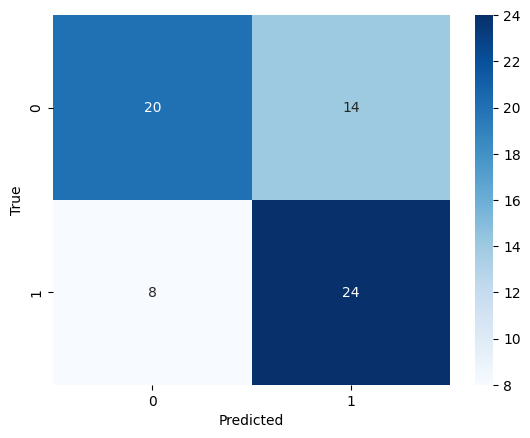

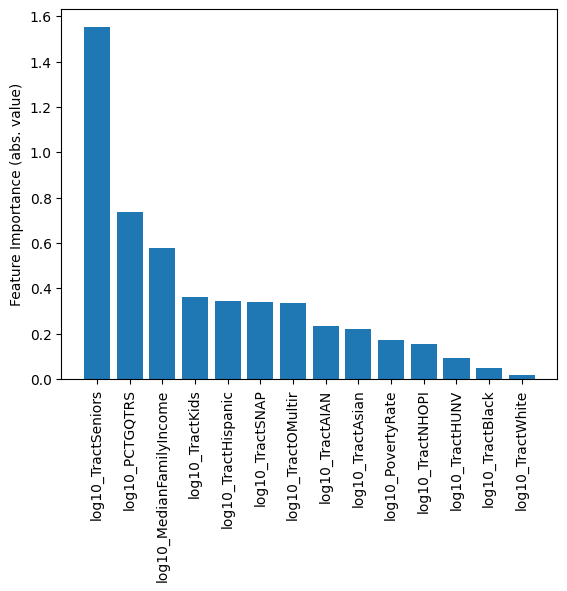

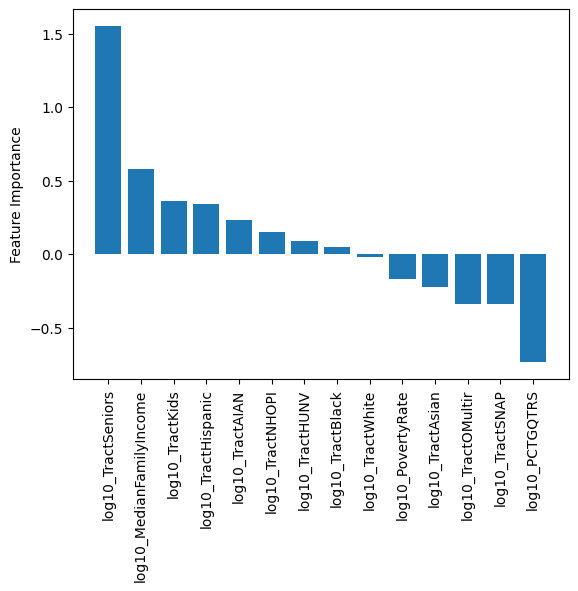

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion matrix
y_pred = elr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Get the absolute value of the coefficients
coef_abs = np.abs(elr.coef_[0])

# Sort the coefficients in descending order
sorted_idx = np.argsort(coef_abs)[::-1]

# Extract the names of the features
feature_names = np.array(X.columns)

# Plot the feature importance using a bar chart
plt.bar(feature_names[sorted_idx], coef_abs[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance (abs. value)')
plt.show()


# Sort the coefficients in descending order
sorted_idx = np.argsort(elr.coef_[0])[::-1]

# Extract the names of the features
feature_names = np.array(X.columns)

# Plot the feature importance using a bar chart
plt.bar(feature_names[sorted_idx], elr.coef_[0][sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.show()



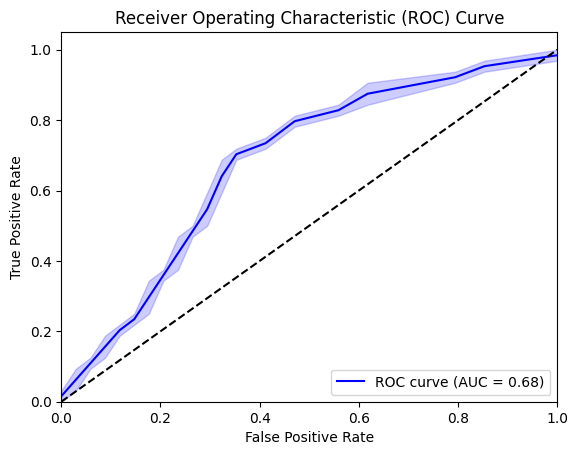

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve
y_pred_prob = elr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
observation_index = 0

actual_value = actual.iloc[observation_index]
pred_value = pred.iloc[observation_index]

comparison = pd.DataFrame({'Actual': actual_value, 'Predicted': pred_value})


In [ ]:
predictions = elr.predict(X.iloc[[0:2]])

comparison = pd.DataFrame({'Actual': y.iloc[[0:2]], 'Predicted': predictions})

comparison


SyntaxError: ignored

In [ ]:
predictions = elr.predict(X_test.iloc[0:2])
comparison = pd.DataFrame({'Actual': y_test.iloc[0:2], 'Predicted': predictions})


print(X_test.iloc[0:2], y_test.iloc[0:2])
print(comparison)

      log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
11          0.212188           0.568202                  5.025539   
1208        0.037426           0.732394                  4.707826   

      log10_TractKids  log10_TractSeniors  log10_TractWhite  log10_TractBlack  \
11           2.938520            2.950365          3.584896          1.785330   
1208         2.965672            2.853090          3.584783          1.633468   

      log10_TractAsian  log10_TractNHOPI  log10_TractAIAN  log10_TractOMultir  \
11            2.466868          0.000000         1.176091            2.152288   
1208          2.008600          0.845098         1.653213            2.269513   

      log10_TractHispanic  log10_TractHUNV  log10_TractSNAP  
11               2.127105         1.462398         1.880814  
1208             2.238046         1.986772         2.247973   11      1
1208    0
Name: FoodDesert, dtype: int64
      Actual  Predicted
11         1          1
1208       0       

In [ ]:
predictions = elr.predict(X_test.iloc[[0]])
comparison = pd.DataFrame({'Actual': y_test.iloc[[0]], 'Predicted': predictions})


print(X_test.iloc[[0]], y_test.iloc[[0]])
print(comparison)


    log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
11        0.212188           0.568202                  5.025539   

    log10_TractKids  log10_TractSeniors  log10_TractWhite  log10_TractBlack  \
11          2.93852            2.950365          3.584896           1.78533   

    log10_TractAsian  log10_TractNHOPI  log10_TractAIAN  log10_TractOMultir  \
11          2.466868               0.0         1.176091            2.152288   

    log10_TractHispanic  log10_TractHUNV  log10_TractSNAP  
11             2.127105         1.462398         1.880814   11    1
Name: FoodDesert, dtype: int64
    Actual  Predicted
11       1          1


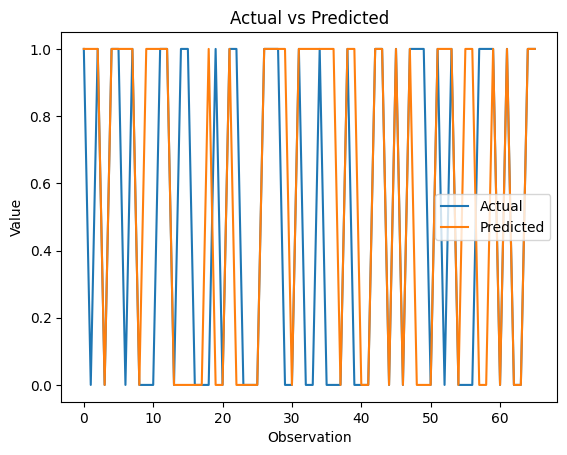

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'elr'
# and a test dataset named 'X_test'

# Generate predicted values for the test dataset
y_pred = elr.predict(X_test)

# Plot the actual vs predicted values
plt.plot(range(len(X_test)), y_test, label='Actual')
plt.plot(range(len(X_test)), y_pred, label='Predicted')

# Set labels and title for the plot
plt.xlabel('Observation')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Show the plot
plt.show()


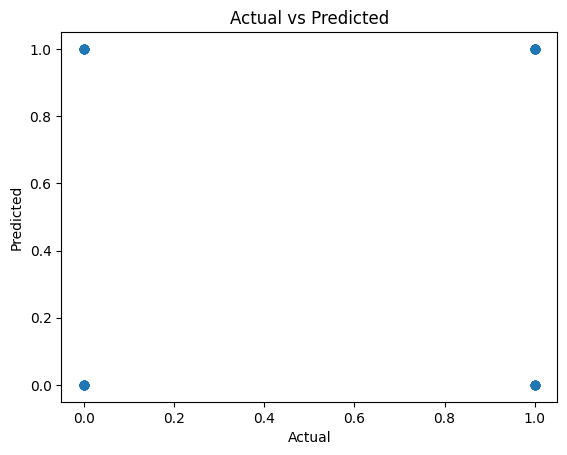

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'elr'
# and a test dataset named 'X_test'

# Generate predicted values for the test dataset
y_pred = elr.predict(X_test)

# Create a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)

# Set labels and title for the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Show the plot
plt.show()
